In [42]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [44]:
voltage = 1
disturbance = 0
moment_of_inertia = 2
electromotive_force_constant = 0.0274
torque_constant = 10
viscous_friction_coefficient = 0.5
inductance_of_armature = 1e-3
resistance_of_armature = 0.4
s = control.tf('s')
time_vector = np.linspace(0, 10, 10000) 

# Questão 1 (Motor controlado pelo campo)

O propulsor controlado magneticamente cria uma força rotacional por meio de uma corrente elétrica constante proveniente de uma fonte ou bateria. No livro "Modern Control Systems" de DORF, é apresentada a função de transferência para este sistema. Por meio das equações que relacionam a corrente do rotor do motor, uma constante que representa o motor e, depois de aplicar a transformada de Laplace, podemos desenvolver a relação entre a tensão do campo (que aciona o motor) e a corrente do rotor:

$$V(s) = (R_f + L_fs)I_f(s)$$

Além disso, sabemos que o torque na carga do motor pode ser descrito como:

$$T_l(s)=T_m(s) - T_d(s)$$

O torque do motor é dado por:

$$T_m(s)=K_m I_f(s)$$

E a relação entre a corrente e a tensão do rotor (onde Rf é a resistência do rotor e Lf é sua indutância) é:

$$I_f(s)=\frac{V_f(s)}{R_f + L_fs}$$


Desprezando a perturbação Td no torque final, obtemos a seguinte equação de transferência:

$$ \frac{\theta(s)}{V_f(s)}=\frac{K_m}{(R_f + L_fs)(Js + b)s}$$

Essa função de transferência fornece a velocidade do motor a partir do tempo e da tensão aplicada. Para obter a posição do eixo na saída desta função, multipliquei-a por 1/s. Em meus experimentos abaixo, chamei a primeira parte do denominador de modelo elétrico e a segunda parte de modelo mecânico, devido à natureza de cada função.


In [45]:
electric_model = 1 / (inductance_of_armature * s + resistance_of_armature)
mechanical_model = 1 / (moment_of_inertia * s + viscous_friction_coefficient)
velocity_model = ((torque_constant * electric_model) + disturbance) * mechanical_model
position_model = velocity_model * (1/s)

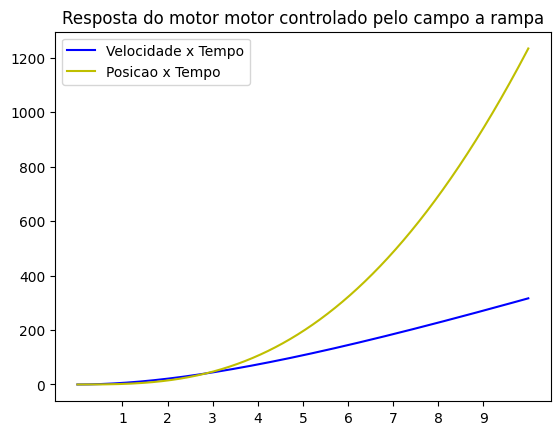

In [46]:
y_velocity = control.forced_response(velocity_model, time_vector, time_vector)[1]
y_position = control.forced_response(position_model, time_vector, time_vector)[1]

plt.xticks(range(1, 10))
plt.plot(time_vector, y_velocity, 'b-', label="Velocidade x Tempo")
plt.plot(time_vector, y_position, 'y-', label="Posicao x Tempo")
plt.title('Resultado do motor controlado pelo campo a rampa')
plt.legend(loc = 'upper left')
plt.show() # Resultado a rampa do motor

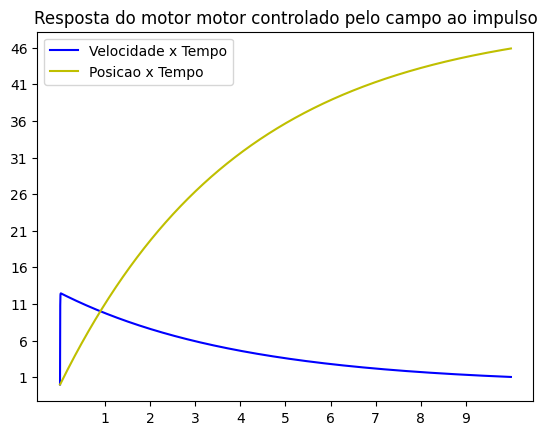

In [47]:
y_velocity = control.impulse_response(velocity_model, time_vector)[1]
y_position = control.impulse_response(position_model, time_vector)[1]

plt.xticks(range(1, 10))
plt.yticks(range(1, 50, 5))
plt.plot(time_vector, y_velocity, 'b-', label="Velocidade x Tempo")
plt.plot(time_vector, y_position, 'y-', label="Posicao x Tempo")
plt.title('Resultado do motor controlado pelo campo ao impulso')
plt.legend(loc = 'upper left')
plt.show() # Impulso do motor

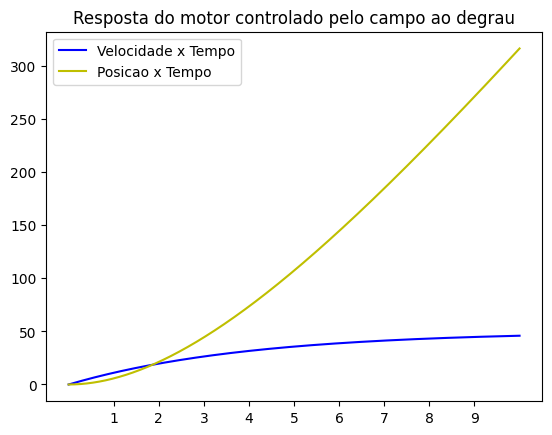

In [48]:
y_velocity = control.step_response(velocity_model, time_vector)[1]
y_position = control.step_response(position_model, time_vector)[1]


plt.xticks(range(1, 10))
plt.plot(time_vector, y_velocity, 'b-', label="Velocidade x Tempo")
plt.plot(time_vector, y_position, 'y-', label="Posicao x Tempo")

plt.title('Resultado do motor controlado pelo campo ao degrau')
plt.legend(loc = 'upper left')
plt.show() # Resultado ao degrau do motor

# Questão 1 (Motor controlado pela armadura)

Neste momento, utilizei as funções de transferência criadas anteriormente.
No motor com controle de armadura, a velocidade é controlada pela variação da corrente que flui através da armadura do motor. Quando a corrente é aumentada, a força magnética na armadura também aumenta, resultando em um aumento da velocidade do motor. Da mesma forma, quando a corrente é reduzida, a força magnética também diminui, levando a uma diminuição da velocidade do motor.

Para alcançar este controle, é necessário realimentar a função de transferência. Para realizar essa realimentação, utilizei a função `feedback` da biblioteca de controle mencionada anteriormente.

In [49]:
electric_model = 1 / (inductance_of_armature * s + resistance_of_armature)
mechanical_model = 1 / (moment_of_inertia * s + viscous_friction_coefficient)
velocity_model = ((electric_model * torque_constant) + disturbance) * mechanical_model
velocity_model = control.feedback(velocity_model, electromotive_force_constant) ## Retroalimentação
position_model = velocity_model * (1/s)

t = np.linspace(0, 10, 10000)

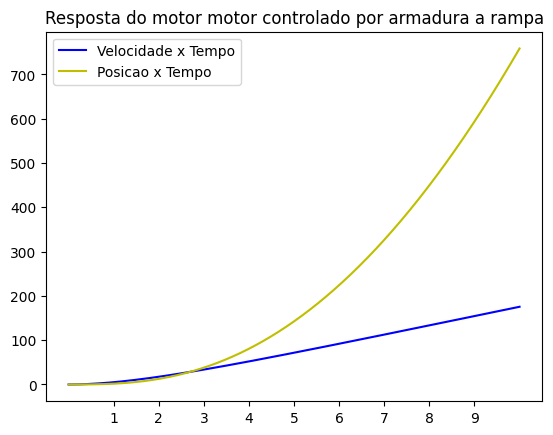

In [50]:
y_velocity = control.forced_response(velocity_model, time_vector, time_vector)[1]
y_position = control.forced_response(position_model, time_vector, time_vector)[1]

plt.xticks(range(1, 10))
plt.plot(time_vector, y_velocity, 'b-', label="Velocidade x Tempo")
plt.plot(time_vector, y_position, 'y-', label="Posicao x Tempo")
plt.title('Resultado do motor controlado por armadura a rampa')
plt.legend(loc = 'upper left')
plt.show()

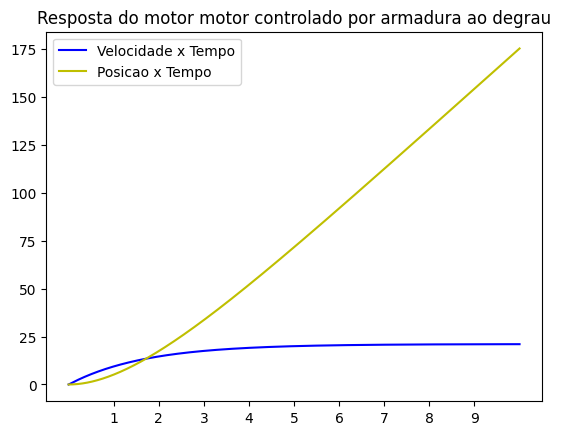

In [51]:
y_velocity = control.step_response(velocity_model, time_vector)[1]
y_position = control.step_response(position_model, time_vector)[1]

plt.xticks(range(1, 10))
plt.plot(time_vector, y_velocity, 'b-', label="Velocidade x Tempo")
plt.plot(time_vector, y_position, 'y-', label="Posicao x Tempo")
plt.title('Resultado do motor controlado por armadura ao degrau')
plt.legend(loc = 'upper left')
plt.show()

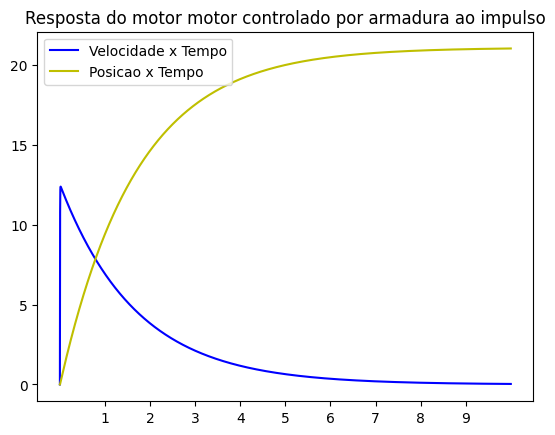

In [52]:
y_velocity = control.impulse_response(velocity_model, time_vector)[1]
y_position = control.impulse_response(position_model, time_vector)[1]

plt.xticks(range(1, 10))
plt.plot(time_vector, y_velocity, 'b-', label="Velocidade x Tempo")
plt.plot(time_vector, y_position, 'y-', label="Posicao x Tempo")
plt.title('Resultado do motor controlado por armadura ao impulso')
plt.legend(loc = 'upper left')
plt.show() #Resultado ao impulso do motor